# 2020270026 王姿文 HW1

In [1]:
#import all packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pynverse import inversefunc
from scipy.optimize import minimize
import math
import warnings
warnings.filterwarnings("ignore")

----------
## 1

### (1)

1. 首先求$x$的$CDF-F(x)$，得到$F(x)=\frac{x^2+x}{2},0<x<1$。
2. 令$F(x) \sim U(0,1)$，求反函数$F^{-1}(U)$以求得$x$。

(0.0, 1.0)

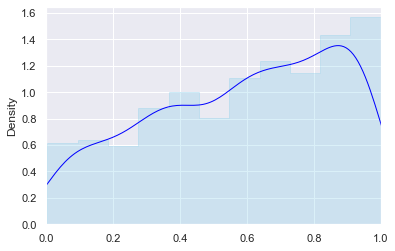

In [2]:
cube = (lambda x: (x**2+x)/2) #1
F = inversefunc(cube,domain = [0,1]) #2
U = np.random.uniform(0,1,1000)
x = F(U)

sns.set_theme()
sns.distplot(x,
             kde_kws={"color": "blue", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step",
                       "alpha": 0.3, "color": "skyblue",'fill':True},)
plt.xlim(0, 1)

### (2) 

1. 先从分布$\sim U(0,1)$产生1000个$x$。
2. 令$g(x) = 1$。
3. 从分布$U(0,1)$产生$U$。
3. `Acceptance-Rejection`的条件公式中，需使得$U \leq \frac{f(x)}{cg(x)}$，才会返回$x$，其中$c$可以设定成$f(x)=x+\frac{1}{2}$的最大值，故$c=1.5$。

(0.0, 1.0)

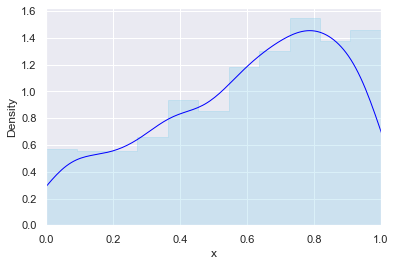

In [3]:
n = 1000
x = np.random.uniform(0,1,n)#1

f = (lambda x: (x+1/2))
accept =  []

for i in range(len(x)):
    U = np.random.uniform(1, 0, 1)
    if(1*1.5*U <=f(x[i])):
        accept.append('Yes') 
    elif(1*1.5*U > f(x[i])):
        accept.append('No') 
  
dty = pd.DataFrame({'x':x,'l':accept})
dty.l.value_counts()
dty.l = dty.l.astype("category")

sns.set_theme()
sns.distplot(dty.x[dty.l=='Yes'],
             kde_kws={"color": "blue", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step",
                       "alpha": 0.3, "color": "skyblue",'fill':True},)
plt.xlim(0, 1)

但需要注意的是，若原本生成1000个样本，也会因为条件原因，导致不会产生1000个随机数，必须再继续生成更多样本以达到1000个随机数的目标，下面则是此次结果产生的随机数，共有667个。

In [4]:
dty.l.value_counts()

Yes    633
No     367
Name: l, dtype: int64

(0.0, 1.0)

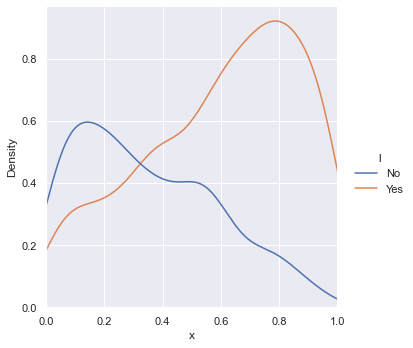

In [5]:
sns.set_theme()
sns.displot(data=dty,x='x', hue='l', kind='kde')
plt.xlim(0, 1)

### (3)

承上，`Inverse Transformation Method`的效率较高，因为此方法是以1000个样本就能模拟产生1000个随机数。

----------
## 2

### (1)
已知$f(x) = \frac{2}{\sqrt{2 \pi}}e^{\frac{-x^2}{2}}, 0<x<\infty$   
$g(x)=e^{-x}, 0<x<\infty$   
$c = max \frac{f(x)}{g(x)}$   
先画图得出最大值小于2，再求解得出在$x = 0.49999781$时，$c=1.025$。

Maximum 1.0245040556487026 attained at [0.49999781]


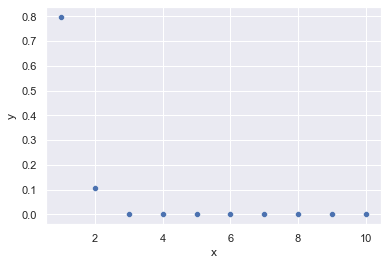

In [6]:
f = (lambda x: (2*math.exp(-(x**2))/math.sqrt(2*np.pi)))
g = (lambda x: math.exp(-x))
k = (lambda x: (2*math.exp(-(x**2)+x)/math.sqrt(2*np.pi)))


x = [x for x in range(1,10+1)]
y = [k(i) for i in x]
dt = pd.DataFrame({'x':x,'y':y})
sns.set_theme()
sns.scatterplot(data=dt,x='x', y = 'y')

res = minimize(lambda x: -k(x),0)
print('Maximum {} attained at {}'.format(-res.fun, res.x))
c = -res.fun

### (2)

1. 先从分布$\sim g(x)$产生1000个$x$。
2. 再从分布$U(0,1)$产生$U$。
3. `Acceptance-Rejection`的条件公式中，需使得$U \leq \frac{f(x)}{cg(x)}$，才会返回$x。

<AxesSubplot:xlabel='x', ylabel='Density'>

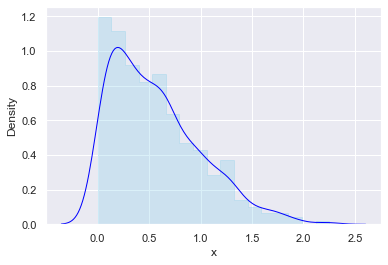

In [7]:
n = 1000
x = np.random.exponential(scale=1.0, size=n) #1
accept =  []

for i in range(len(x)):
    U = np.random.uniform(1, 0, 1) #2
    if(g(x[i])*c*U <=f(x[i])): #3
        accept.append('Yes') 
    elif(g(x[i])*c*U > f(x[i])):
        accept.append('No') 
  
dty = pd.DataFrame({'x':x,'l':accept})
dty.l = dty.l.astype("category")

sns.set_theme()
sns.distplot(dty.x[dty.l=='Yes'],
             kde_kws={"color": "blue", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step",
                       "alpha": 0.3, "color": "skyblue",'fill':True},)

这是成功产生的随机数。

In [13]:
dty.l.value_counts()

Yes    56063
No     43937
Name: l, dtype: int64

### (3)

希望從已經生成的隨機數$|Z|$中再求得$Z$，$Z$應該是$|Z|$的對稱圖形

<AxesSubplot:xlabel='x', ylabel='Density'>

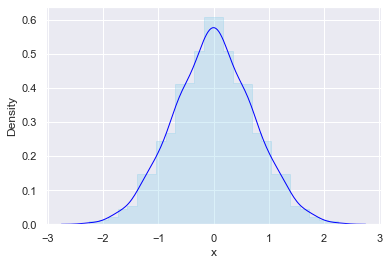

In [8]:
dt = dty[dty.l=='Yes'].x
dtn = -dt
df = pd.concat([dt,dtn])
sns.set_theme()
sns.distplot(df,
             kde_kws={"color": "blue", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step",
                       "alpha": 0.3, "color": "skyblue",'fill':True},)

-----------
## 3

此題是若干個$F_{j}(x)$相乘，然而其$x$為同一個。可以修改`Sklar`來應用。   
1. 首先找到對應的$copula$，$F(x) = \prod_{j=1}^k F_{j}(x) = C(F_{1}(x),...,F_{k}(x))$。
2. 則$(U_1,U_2,...,U_k) \sim C$
3. 又知道$X = (X_1,...,X_k) = (F_{-1}(x),...,F_{-k}(x))$，故求得X。

-----------
## 4

已知$g(x) = \frac{f(x)}{F(b)-F(a)}, a\leq x \leq b$，欲求随机数。

1. `Inverse Transformation Method`    
由于$F(b)-F(a)$是固定的常数，因此可令$F(b)-F(a) = c$，则$g(x) = \frac{f(x)}{c}, a\leq x \leq b$。   
而$G(x) \sim U(0,1)$，因此可由$x = G^{-1}(U)$得到随机数。   
由上述可以推出$G(x) = \frac{F(x)}{c}$，故$x = G^{-1}(U) = cF^{-1}(U) = (F(b)-F(a))F^{-1}(U)$，随机数成功生成。

2. `Acceptance-Rejection`    
在此算法中，需使得$U \leq \frac{f(x)}{cg(x)}$，才会返回$x$。   
已知$F(b)-F(a)$为常数，且可令$F(b)-F(a) = c$，故获得$g(x) = \frac{f(x)}{c}, a\leq x \leq b$，因此可将此视为条件式带入算法内生成随机数。    
令$g(.)$生成$x$，再带入$U \leq \frac{f(x)}{cg(x)}$条件，若满足条件则返回$x$，随机数成功生成。

-----
## 5

1. 先从分布$\sim U(0,1)$产生1000个$x$。
2. 令$g(x) = 1$。
3. 从分布$U(0,1)$产生$U$。
3. `Acceptance-Rejection`的条件公式中，需使得$U \leq \frac{f(x)}{cg(x)}$，才会返回$x$，其中$c$可以设定成$f(x)=12x^2(1-x)$的最大值，故$c=1.7777$。

Maximum 1.7777777777777775 attained at [0.66666666]


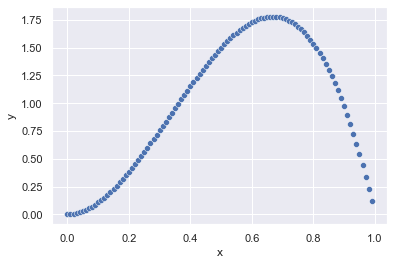

In [9]:
f = (lambda x: 12*(x**2)*(1-x))
x = [x for x in np.arange(0.0, 1.0, 0.01)]
y = [f(i) for i in x]
dt = pd.DataFrame({'x':x,'y':y})
sns.set_theme()
sns.scatterplot(data=dt,x='x', y = 'y')

res = minimize(lambda x: -f(x),1)
print('Maximum {} attained at {}'.format(-res.fun, res.x))
c = -res.fun

<AxesSubplot:xlabel='x', ylabel='Density'>

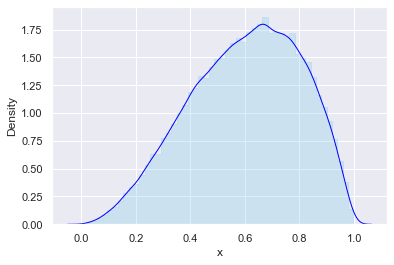

In [10]:
n = 100000
x = np.random.uniform(0,1,n)
accept =  []

for i in range(len(x)):
    U = np.random.uniform(1, 0, 1)
    if(1*c*U <=f(x[i])):
        accept.append('Yes') 
    elif(1*c*U > f(x[i])):
        accept.append('No') 
  
dty = pd.DataFrame({'x':x,'l':accept})
dty.l = dty.l.astype("category")

sns.set_theme()
sns.distplot(dty.x[dty.l=='Yes'],
             kde_kws={"color": "blue", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step",
                       "alpha": 0.3, "color": "skyblue",'fill':True},)

这是成功产生的随机数。

In [11]:
dty.l.value_counts()

Yes    56063
No     43937
Name: l, dtype: int64

根据$f(x)=12x^2(1-x)$可以得知$f(x)\sim Bata(3,2)$，故$E(x) = \frac{3}{5} = 0.6$。   
由下可以得出产生的随机数之平均与理论值差不多相符。

In [12]:
dty.x[dty.l=='Yes'].mean()

0.6017004016717269